<a href="https://colab.research.google.com/github/Fatimah3009/student-performance/blob/main/StudentPerformanceFactors_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# 2. Load Dataset
# (Upload the dataset in Colab before running this cell)
df = pd.read_csv("StudentPerformanceFactors.csv")

In [4]:
# 3. Quick Data Check
print("Shape of dataset:", df.shape)
print(df.head())

Shape of dataset: (6607, 20)
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teache

In [5]:
# 4. Check missing values & info
print(df.info())
print("Missing values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [6]:
# 5. Basic Statistics
print(df.describe())

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.00000

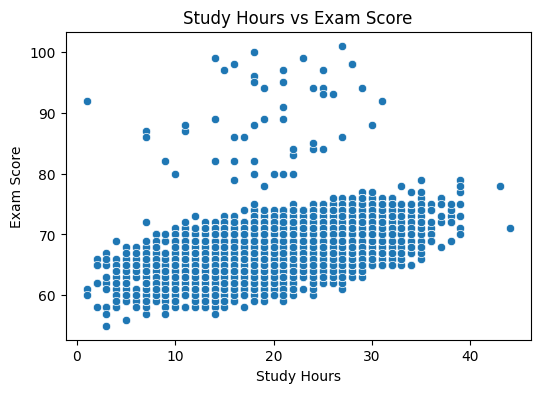

In [8]:
# 6. Basic Visualisation
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["Hours_Studied"], y=df["Exam_Score"])
plt.title("Study Hours vs Exam Score")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

In [10]:
# 7. Define Features & Target (basic: study hours only)
X = df[["Hours_Studied"]]
y = df["Exam_Score"]

In [11]:
# 8. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
# 9. Train Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [13]:
# 10. Predictions
y_pred = lin_reg.predict(X_test)

In [14]:
# 11. Evaluation
print("Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Linear Regression Performance:
MAE: 2.4475687452945643
MSE: 10.85592128879332
R2 Score: 0.2319868674542106


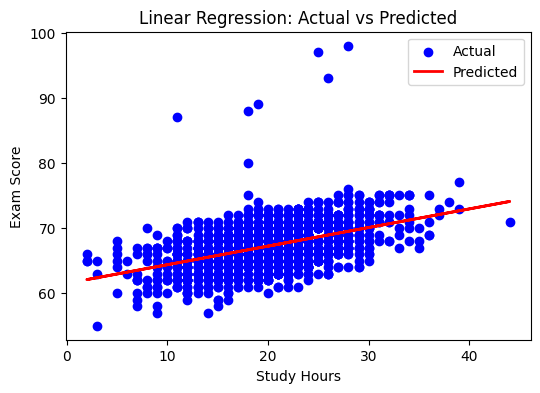

In [15]:
# 12. Visualize Predictions
plt.figure(figsize=(6,4))
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Predicted")
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.legend()
plt.show()

In [16]:
# BONUS: Polynomial Regression

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

poly_reg = LinearRegression()
poly_reg.fit(X_train_p, y_train_p)

y_pred_poly = poly_reg.predict(X_test_p)

print("\nPolynomial Regression Performance:")
print("MAE:", mean_absolute_error(y_test_p, y_pred_poly))
print("MSE:", mean_squared_error(y_test_p, y_pred_poly))
print("R2 Score:", r2_score(y_test_p, y_pred_poly))


Polynomial Regression Performance:
MAE: 2.4447795821288105
MSE: 10.84498813570501
R2 Score: 0.23276034442853466


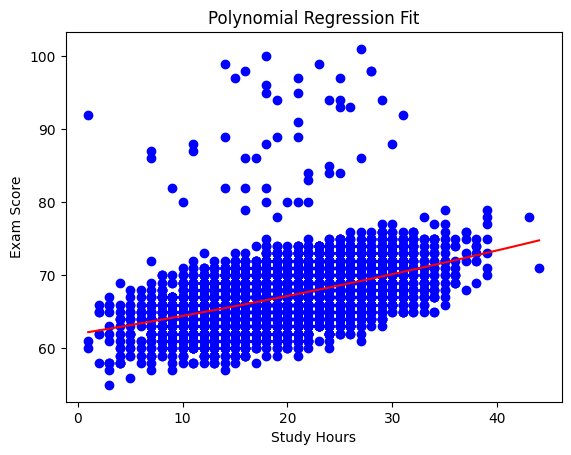

In [17]:
# Visualisation of Polynomial Fit
X_grid = np.linspace(min(X.values), max(X.values), 100).reshape(-1,1)
plt.scatter(X, y, color="blue")
plt.plot(X_grid, poly_reg.predict(poly.fit_transform(X_grid)), color="red")
plt.title("Polynomial Regression Fit")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

In [18]:
# Extra Experiment: Add more features
# Example: Using study hours + sleep hours + participation

if "Sleep Hours" in df.columns and "Extracurricular Activities" in df.columns:
    X_extra = df[["Hours_Studied", "Sleep Hours", "Extracurricular Activities"]]
    y_extra = df["Exam_Score"]

    X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(
        X_extra, y_extra, test_size=0.2, random_state=42
    )

    lin_reg_extra = LinearRegression()
    lin_reg_extra.fit(X_train_e, y_train_e)

    y_pred_extra = lin_reg_extra.predict(X_test_e)

    print("\nMultiple Features (Study+Sleep+Participation) Performance:")
    print("MAE:", mean_absolute_error(y_test_e, y_pred_extra))
    print("MSE:", mean_squared_error(y_test_e, y_pred_extra))
    print("R2 Score:", r2_score(y_test_e, y_pred_extra))

In [19]:
# Accuracy (R² Score as percentage)
accuracy = r2_score(y_test, y_pred) * 100
print(f"Linear Regression Accuracy: {accuracy:.2f}%")

poly_accuracy = r2_score(y_test_p, y_pred_poly) * 100
print(f"Polynomial Regression Accuracy: {poly_accuracy:.2f}%")


Linear Regression Accuracy: 23.20%
Polynomial Regression Accuracy: 23.28%


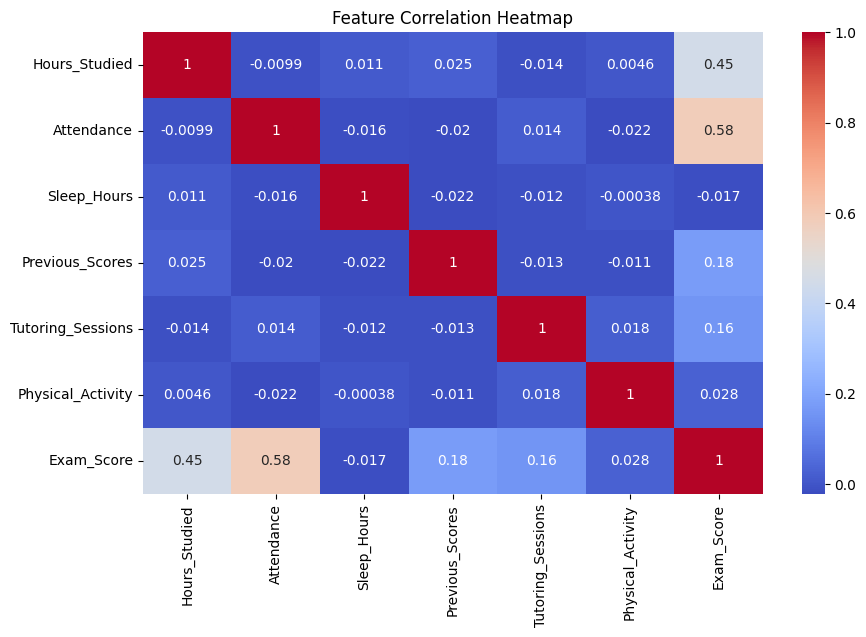

In [21]:
plt.figure(figsize=(10,6))
# Drop non-numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

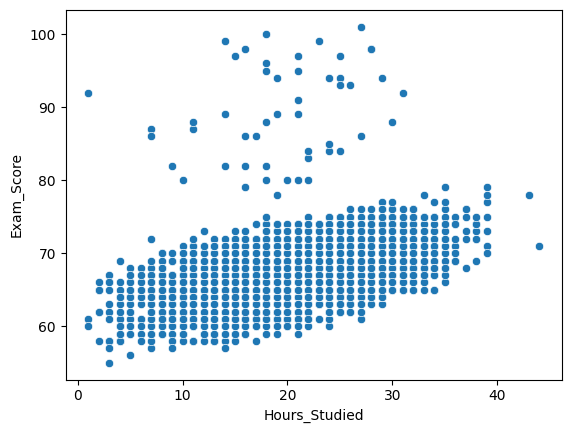

In [22]:
sns.scatterplot(x="Hours_Studied", y="Exam_Score", data=df)
plt.show()


Our low R² (~23%)/low accuracy happened because we were using only Hours_Studied as a feature, which explains only 45% of the variation.

If we add Attendance + Hours_Studied + Previous_Scores + Tutoring_Sessions,our model accuracy should increase significantly (probably 60–70%+).

In [23]:
# Select strongest predictors
X = df[["Hours_Studied", "Attendance", "Previous_Scores", "Tutoring_Sessions"]]
y = df["Exam_Score"]

In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predict
y_pred = model.predict(X_test)

In [27]:
# Evaluate
print("Multiple Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
print("Accuracy:", r2_score(y_test, y_pred) * 100, "%")

Multiple Linear Regression Performance:
MAE: 1.27321223353161
MSE: 5.069439258236873
R2 Score: 0.6413573918421557
Accuracy: 64.13573918421557 %
